# 🌟 Assignment 2. Operation "AI GeoGuessr"

### Deadline: Friday, October 24, 2025, 11:59:00 PM CET (GMT +2)

## 🎯 Mission Overview

The operation consists of two independent missions. Similar to the previous operation, students are required to solve the tasks by achieving the required score and answering the follow-up questions.

## 🧪 Neural Networks and Unsupervised Learning

1. **Mission 2.1 (Supervised Learning)**: 
   - Solve a supervised learning problem using a multilayer perceptron (MLP).

2. **Mission 2.2 (Unsupervised Learning)**:
   - Given an unlabeled dataset, your task is to cluster similar data points and achieve 100% clustering accuracy. You will not have access to the true labels, but you can verify your cluster assignments using the Kaggle competition provided.

## 📝 Delivery Format (Blackboard)

Please submit **two files**:
1. The completed Jupyter notebook.
2. The solution for the second dataset as a CSV file with two `int` columns: `['ID', 'cluster']`.

## Kaggle details
- Invitation link: https://www.kaggle.com/t/dfb72837bdb346449768b8f6ce50b6dc
- Kaggle is a popular platform for data science competitions.
- It allows us to create a Private competition where you can submit your solutions and verify whether you are thinking in the right direction.
- The results of the competition is visible only to the competition participants. 
- We will not grade the submissions on Kaggle, we set it up to let you check your clustering.
- You still have to deliver the `.csv` file of the solution and the complete `.ipynb` notebook with discussions and solution code.  

> Good luck, comrade!

In [165]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# 🧠 Mission 2.1: Decoding SkyNet's Neural Encryption **(using Neural Networks)**

### 🌐 The Discovery
The dataset consists of the same "Synapse Cipher" data from Assignment 1.

### 🎯 Your Mission
1. Implement a multilayer perceptron (MLP) using one of the following frameworks: Keras, PyTorch, or TensorFlow.
2. Solve the non-linear problem without manual feature engineering.
3. Predict SkyNet's binary decisions (0 or 1) based on paired signals.
4. Improve performance by using techniques such as learning rate scheduling, selecting a good optimizer, and fine-tuning hyperparameters.

> Note: There are no restrictions on the tricks you can use — Have fun :) 

### 📊 Formal Requirements
1. **Implementation**:
   - Develop a Neural Network using predefined functions/layers.
   - Use one of the popular frameworks: Keras, PyTorch, or TensorFlow.
   - Implement a manual learning rate scheduler with warmup and cosine decay.

2. **Performance**: Achieve at least **0.92** accuracy on the test set.

3. **Discussion**:
   - How can you make sure the results are reproduable?
   - Visualize the network's architecture and decision boundary.
   - Which optimizer did you choose? Discuss the differences between SGD and Adam.
   - Plot the learning rate curve. Did the learning rate scheduling improve performance? Why or why not?
   - Conduct a simple ablation study of each architectural and optimization choice concerning test accuracy.

In [166]:
data = pd.read_csv('nn_data.csv')
train = data[data['split'] == 'train']
test = data[data['split'] == 'test']

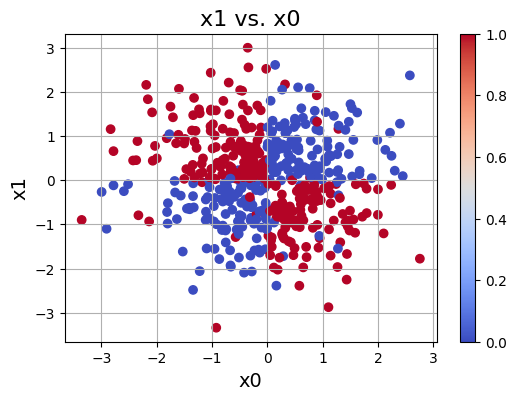

In [167]:
plt.figure(figsize=(6, 4))
plt.scatter(train['x0'], train['x1'], c=train['y'], cmap='coolwarm')
plt.grid(True)
plt.xlabel('x0', fontsize=14)
plt.ylabel('x1', fontsize=14)
plt.title('x1 vs. x0', fontsize=16)
plt.colorbar()
plt.show()

In [168]:
# Importing necessary libraries

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Input
from tensorflow.keras.callbacks import LearningRateScheduler
# from tensorflow.keras import set

import random

In [169]:
# Loading the data values in 1-D and 2-D arrays

x_Train = train[['x0', 'x1']].values
y_Train = train['y'].values

x_Test = test[['x0', 'x1']].values
y_Test = test['y'].values

In [170]:
# Setting up the model
import tensorflow as tf

SEED = 50

np.random.seed(SEED)
tf.random.set_seed(SEED)
random.seed(SEED)

BATCH_SIZE = 64
EPOCHS = 100

model = Sequential()
# model.add(Input(shape=(2,)))
model.add(Dense(8, activation = 'relu', name = 'Layer1'))
model.add(Dense(8, activation = 'relu', name = 'Layer2'))
# model.add(Dense(8, activation = 'relu', name = 'Layer3'))
model.add(Dense(1, activation = 'sigmoid', name = 'Predictions'))

In [171]:
# model.layers
# model.weights
# model.summary

In [172]:
# Setting up learning rate scheduler

def learning_rate_scheduler(epochs, LR_start, total_epochs, warmup_epochs):
    if epochs < warmup_epochs:
        return LR_start * (epochs/warmup_epochs)
    else:
        return LR_start*np.cos(np.pi/2 * (epochs - warmup_epochs)/(total_epochs - warmup_epochs))
    
def make_scheduler(LR_start, total_epochs, warmup_epochs):
    def scheduler(epochs):
        return learning_rate_scheduler(epochs, LR_start, total_epochs, warmup_epochs)
    return scheduler

LR_START = 0.02
WARMUP_EPOCHS = 10

schedule_function = make_scheduler(LR_START, EPOCHS, WARMUP_EPOCHS)
callback = LearningRateScheduler(schedule_function)

In [173]:
# Compiling

model.compile(
    # optimizer = SGD(), # Stochastical gradient descent
    optimizer = Adam(learning_rate = LR_START),
    loss = 'binary_crossentropy', # Loss - cross entropy
    metrics = ['accuracy'], # Velidation matric = accuracy
)

In [174]:
# Training

history = model.fit(
    x_Train,
    y_Train,
    batch_size = BATCH_SIZE,
    epochs = EPOCHS,
    # validation_split = 0.2,
    callbacks = [callback]
)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.5710 - loss: 0.6929 - learning_rate: 0.0000e+00
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5634 - loss: 0.6890 - learning_rate: 0.0020
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5578 - loss: 0.6705 - learning_rate: 0.0040
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6141 - loss: 0.6439 - learning_rate: 0.0060
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6903 - loss: 0.6130 - learning_rate: 0.0080
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8116 - loss: 0.5710 - learning_rate: 0.0100
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8995 - loss: 0.5106 - learning_rate: 0.0120
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9042 - loss: 0.4361 - learning_rate: 0.0140
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8953 - loss: 0.3667 - learning_rate: 0.0160
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━

In [175]:
# Looking at the results

results = model.evaluate(x_Test, y_Test, BATCH_SIZE)
print(f'Accuracy: {results[1]}\nLoss: {results[0]}')

model.summary()

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9247 - loss: 0.2657  
Accuracy: 0.9319999814033508
Loss: 0.2459356039762497


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Layer1 (Dense)                  │ (None, 8)              │            24 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Layer2 (Dense)                  │ (None, 8)              │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Predictions (Dense)             │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 317 (1.24 KB)

 Trainable params: 105 (420.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 212 (852.00 B)

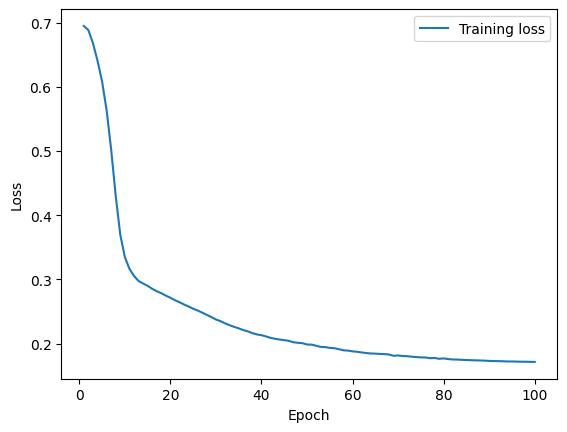

In [176]:
# Plotting the loss

train_loss = history.history['loss']
# val_loss = history.history['val_loss']
x_values = np.arange(1, len(train_loss) + 1)

plt.plot(x_values, train_loss, label = 'Training loss')
# plt.plot(x_values, val_loss, label = 'Validation loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

Discussion Part 1:

a) To ensure that the results are reproducable, we can set the random seeds constant for Python, Numpy and Tensorflow. This makes it so that the same initialization, data shuffling and weight updates are constant.

b) The decision boundary can be seen below.

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1s 496us/step


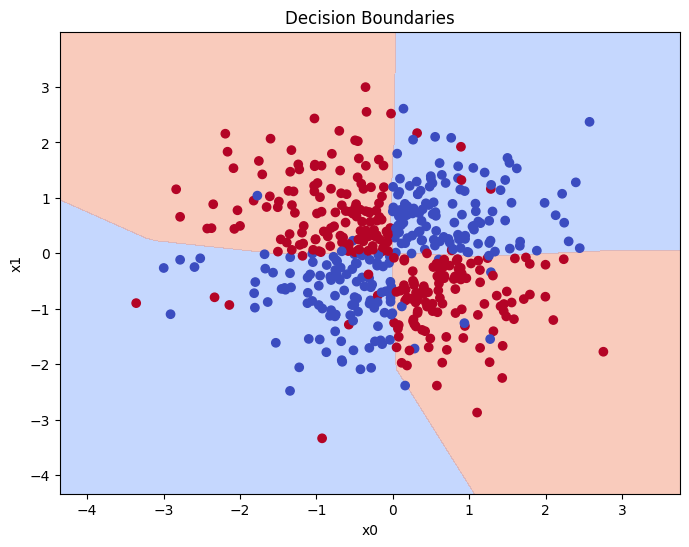

In [177]:
# Plotting the decision boundaries on the training data

x_min, x_max = x_Train[:, 0].min() - 1, x_Train[:, 0].max() + 1
y_min, y_max = x_Train[:, 1].min() - 1, x_Train[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))

grid = np.c_[xx.ravel(), yy.ravel()]
preds = model.predict(grid)
preds = preds.reshape(xx.shape)

plt.figure(figsize = (8,6))
plt.contourf(xx, yy, preds, levels = [0, 0.5, 1], cmap = "coolwarm", alpha = 0.5)

plt.scatter(x_Train[:, 0], x_Train[:, 1], c = y_Train, cmap = "coolwarm")
plt.title("Decision Boundaries")
plt.xlabel("x0")
plt.ylabel("x1")
plt.show()

Discussion Part 2:

c) I tried to use the SGD optimizer, but I could not achieve accuracy above the threshold. Then, I tried with the Adam optimizer, which I eventually got to work after tuning the hyperparameters. The difference between the two models is that SGD updates with a fixed learning rate, while the Adam optimizer adjusts the learning rate individually. Adam usually converges faster, but can also lead to overfitting.

d) The plot can be seen below. Yes, the learning rate scheduling massively improved the performance. When using SGD, the loss looks a bit like a linear curve sinking slowly over epochs. The Adam optimizer, with learning rate scheduling, made the loss decrease (and accuracy increase) at a much higher rate, reaching the stationary response quickly. 

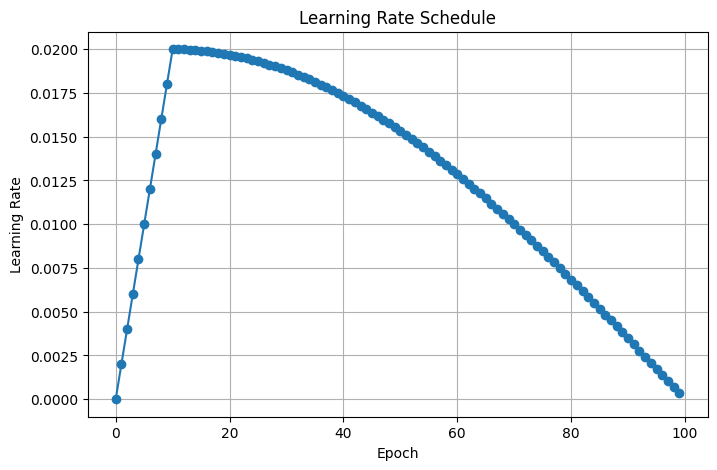

In [178]:
# PLotting the learning rates

epochs_array = np.arange(0, EPOCHS)
LR_values = [schedule_function(epoch) for epoch in epochs_array]

plt.figure(figsize=(8,5))
plt.plot(epochs_array, LR_values, marker='o')
plt.title("Learning Rate Schedule")
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.grid(True)
plt.show()

Discussion Part 3:

e) Tested a few different situations, with different optimizers and hyperparameters. Adam was in general better than SGD, converging much faster to both low loss and high accuracy. SGD could compete when using learning rate scheduler and many epochs, but even then Adam seemed to be better or equal. I also found that reducing my starting learning rate seemed to improve the model. In addition, when I was testing with random seeds, it looked like having few layers with few nodes seemed to work best. Generally in my experience, accuracy was highest with Adam, learning rate scheduler, over 50 epochs and 2-3 layers with around 8 nodes.

# 📶📡🛰️🤳 Mission 2.2: Locate the AI Servers

### 🌐 The Discovery
The NTNU Intelligence team has intercepted encrypted documentation that potentially reveals the locations of AI-compromised servers within Trondheim. Our analysts believe the data contains information about these servers' locations. 

However, the number of servers and their exact positions remain unknown. To execute a strategic response, we need to understand the intercepted data and pinpoint the main AI servers.

We have also discovered a vulnerability in the AI's security: it has deployed a clustering verification feature on Kaggle. We can exploit this backdoor to validate our clustering hypotheses.

### 🎯 Your Mission
Identify the number of hidden servers (clusters) in the dataset. Assign cluster labels to each row in the original dataset and validate your clustering solution on Kaggle.  When achieved the perfect clustering accuracy, find the precise locations of these servers (clusters).

### 🧠 The Challenge
1. **Large Dataset**: The intercepted data file contains numerous features, making direct manipulation and clustering difficult. Applying dimensionality reduction techniques could help reveal patterns.
2. **Unsupervised Learning**: No target labels are provided, so you must identify patterns based solely on the dataset's features.
3. **Data Obfuscation**: The AI has obfuscated the data, making it difficult to discern its true structure. You must effectively manipulate the data to visually identify server locations.


### 🚀 Your Tools
- The intercepted AI dataset.
- Skills in feature engineering, data manipulation, and visualization.
- Clustering algorithms (e.g., KMeans, DBSCAN, Birch, Agglomerative Clustering, etc.) — [Clustering in Scikit-Learn](https://scikit-learn.org/stable/modules/clustering.html)
- Dimensionality reduction techniques (e.g., PCA, t-SNE, Isomap, UMAP, etc.)
- Kaggle competition platform with a daily submission limit of 50 attempts.

> Note: Kaggle competition link — [Kaggle Competition](https://www.kaggle.com/t/dfb72837bdb346449768b8f6ce50b6dc)

### 📊 Formal Requirements
1. **Achieve 100% Clustering Accuracy** on Kaggle.
> Note: The only way to check whether your clustering is correct is to submit it to Kaggle. We do not give you the clusters directly.

2. **Discussion Questions**:
   - **Dimensionality Reduction**: Which dimensionality reduction methods helped you determine the correct number of clusters? Why did some methods work better than others? Explain the differences between PCA, t-SNE, and UMAP.
   - **Clustering Approach**: Which clustering algorithm and hyperparameters did you use? Discuss the differences between algorithms like KMeans and DBSCAN.
   - **Data Type Analysis**: What is the hidden data type in the dataset? How does this information influence feature extraction for clustering? Can it explain why some dimensionality reduction algorithms are more effective?
   - **Server Locations**: Identify the server locations. List the specific facilities in Trondheim and explain how you deduced their locations.
   - **Advanced Task (Optional)**: Extract features using modern pre-trained neural networks for this data type. Apply dimensionality reduction and clustering algorithms to the extracted features.

In [179]:
# Hmmmmm, why is the first row skipped?
data = pd.read_csv('unsupervised_data.csv', skiprows=1, header=None)
# Get the ID column
data.reset_index(drop=False, inplace=True)
data.rename(columns={'index': 'ID'}, inplace=True)
data

,ID,0,1,2,3,4,5,6,7,8,...,16374,16375,16376,16377,16378,16379,16380,16381,16382,16383
0,0,0.314365,0.646305,0.323849,0.238492,0.655790,0.646305,0.646305,0.409205,0.646305,...,0.646305,0.646305,0.655790,0.238492,0.646305,0.674758,0.646305,0.238492,0.655790,0.646305
1,1,0.587628,0.494976,0.559832,-0.246237,0.513506,0.550567,0.522772,0.596893,0.606158,...,0.587628,0.550567,0.587628,0.587628,0.550567,0.587628,0.550567,0.596893,0.494976,0.587628
2,2,0.590203,0.367673,0.367673,0.367673,0.367673,0.590203,0.367673,0.590203,0.590203,...,0.590203,0.367673,0.590203,0.590203,0.590203,0.590203,0.590203,0.590203,0.590203,0.476556
3,3,0.589296,0.589296,0.579825,0.551415,0.579825,0.579825,0.608236,0.579825,0.646118,...,0.532474,0.523003,0.589296,0.589296,0.551415,0.134721,0.475652,0.589296,0.570355,0.551415
4,4,0.660095,0.470676,0.190366,0.672806,0.470761,0.672766,0.672652,0.666151,0.672987,...,0.432001,0.672222,0.190568,0.217329,0.633684,0.673294,0.587914,0.671023,0.207578,0.470765
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,3995,0.340739,0.340739,0.340739,0.681823,0.340739,0.340739,0.340739,0.672083,0.340739,...,0.340739,0.662355,0.340739,0.759779,0.331011,0.759779,0.340739,0.691563,0.340734,0.720789
3996,3996,0.384257,0.384257,0.675221,0.384257,0.384257,0.675221,0.384257,0.675221,0.675221,...,0.675221,0.384257,0.675221,0.675221,0.675221,0.384257,0.384257,0.384257,0.675221,0.675221
3997,3997,0.641837,0.651135,0.251329,0.251329,0.651135,0.651135,0.251329,0.651135,0.651135,...,0.251329,0.251329,0.651135,0.251329,0.409392,0.604646,0.651135,0.651135,0.660433,0.251329
3998,3998,0.555533,0.555533,0.555533,0.555533,0.555533,0.555533,0.555533,-0.212897,0.555533,...,0.555533,0.555533,0.555533,0.555533,0.555533,0.555533,0.555533,0.555533,0.555533,0.555533


In [180]:
# The dataset is heavy. Applying clustering directly on the dataset is likely not feasible. 
data.info(0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Columns: 16385 entries, ID to 16383
dtypes: float64(16384), int64(1)
memory usage: 500.0 MB


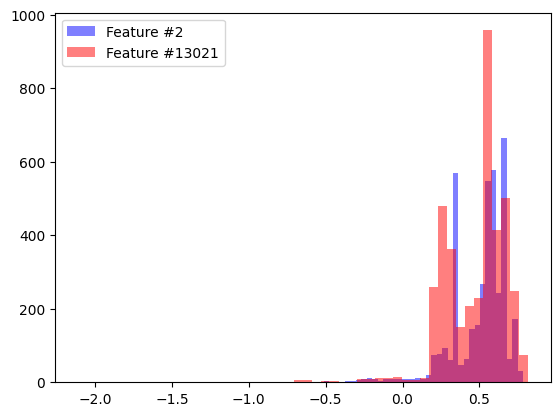

In [181]:
# Features seem to be similarly distributed...
plt.hist(data.iloc[:, 2], bins=50, color='blue', alpha=0.5, label='Feature #2')
plt.hist(data.iloc[:, 13021], bins=50, color='red', alpha=0.5, label='Feature #13021')
plt.legend()
plt.show()

In [182]:
# To check your clustering, you need to assign the predicted cluster ids and submit it as a CSV file. 
# The submission should be a CSV file with two columns: ID and cluster. 

# The ID column should contain the ID of the data point, 
# and the cluster column should contain the cluster ID that the data point belongs to. 

# The cluster ID should be an integer. Current cluster IDs in sample_submission.csv are randomly generated.
sample_submission = pd.read_csv('sample_submission.csv')
sample_submission

,ID,cluster
0,0,0
1,1,1
2,2,0
3,3,1
4,4,2
...,...,...
3995,3995,3
3996,3996,3
3997,3997,0
3998,3998,1



---

## 🎯 Note: Clustering Accuracy Evaluation

The clustering accuracy metric evaluates how well the predicted clusters match the true clusters, irrespective of the specific labels or names assigned to the clusters.

This means that the evaluation is solely based on the correct grouping of data points rather than the numerical labels of the clusters themselves.

## Key Characteristics

- **Name-Independent**: The metric cares only about how well the data points are grouped together, not the specific numerical or categorical labels used for the clusters.
- **Focus on Grouping**: The evaluation rewards cluster assignments that correctly group the same data points together, regardless of the specific labels assigned.

### Example

If the true cluster assignments are:

```
[0, 0, 0, 1, 1, 1]
```

and your predicted cluster assignments are:

```
[1, 1, 1, 0, 0, 0]
```

the accuracy will still be **1.0** because the grouping of points is identical, even though the numerical labels are swapped.

## How the Metric is Computed

1. **Contingency Matrix**: 
   - Construct a contingency matrix that represents the overlap between the true clusters and the predicted clusters.

2. **Optimal Correspondence**: 
   - Use an optimization algorithm, such as the Hungarian method (linear sum assignment), to find the best possible correspondence between true and predicted labels, maximizing the number of correctly assigned data points.

3. **Accuracy Calculation**: 
   - Calculate the accuracy as the ratio of correctly matched data points to the total number of data points.

> This approach ensures that the evaluation is based on **cluster completeness** and **homogeneity**, rewarding cluster assignments that correctly group the same data points together, regardless of the specific labels used.

---

In [183]:
import numpy as np
import scipy.optimize
import sklearn.metrics

def calculate_clustering_accuracy(true_labels: np.ndarray, cluster_labels: np.ndarray) -> float:
    """
    Calculate the clustering accuracy between true labels and cluster labels.

    The function constructs a contingency matrix between the true labels and cluster labels.
    It then uses the Hungarian algorithm (also known as linear sum assignment) to find the
    best matching between the cluster labels and true labels. The clustering accuracy is 
    calculated as the number of correctly matched labels divided by the total number of labels.

    Args:
        true_labels (np.ndarray): An array of true labels for each data point.
        cluster_labels (np.ndarray): An array of cluster labels predicted by a clustering algorithm.

    Returns:
        float: The clustering accuracy, a value between 0 and 1 representing the proportion of 
               correctly matched labels.
    
    Example:
        >>> true_labels = np.array([0, 1, 2, 0, 1, 2])
        >>> cluster_labels = np.array([1, 2, 0, 1, 2, 0])
        >>> calculate_clustering_accuracy(true_labels, cluster_labels)
        1.0

    Raises:
        ValueError: If true_labels and cluster_labels are not of the same length.
    """
    # Check if the input labels are of the same length
    if true_labels.size != cluster_labels.size:
        raise ValueError("true_labels and cluster_labels must have the same length.")

    # Construct a contingency matrix where each cell [i, j] indicates the number of points with 
    # true label i and cluster label j.
    contingency_matrix = sklearn.metrics.cluster.contingency_matrix(true_labels, cluster_labels)
    
    # Find the best matching between true labels and cluster labels using the Hungarian algorithm.
    # We negate the contingency matrix because linear_sum_assignment finds the minimum cost assignment.
    row_ind, col_ind = scipy.optimize.linear_sum_assignment(-contingency_matrix)
    
    # Calculate the number of correctly assigned labels according to the optimal matching.
    correct_pairs = contingency_matrix[row_ind, col_ind].sum()
    
    # Compute the clustering accuracy as the ratio of correctly matched labels to total labels.
    accuracy = correct_pairs / true_labels.size

    return accuracy

In [184]:
true_labels = np.array([0, 1, 2, 0, 1, 2])
cluster_labels = np.array([1, 2, 0, 1, 2, 0])
calculate_clustering_accuracy(true_labels, cluster_labels)

np.float64(1.0)

In [185]:
true_labels = np.array([0, 0, 0, 0, 0, 0])
cluster_labels = np.array([1, 2, 0, 1, 2, 0])
calculate_clustering_accuracy(true_labels, cluster_labels)

np.float64(0.3333333333333333)

In [186]:
true_labels = np.array([1, 1, 1, 2, 2, 2])
cluster_labels = np.array([0, 0, 0, 0, 0, 0])
calculate_clustering_accuracy(true_labels, cluster_labels)

np.float64(0.5)

In [187]:
# Dimention reduction

from sklearn.manifold import TSNE

data_features = data.drop(columns=['ID'])
formatted_data = data_features.to_numpy()
print(formatted_data)

tsne = TSNE(n_components = 3, init = 'pca', perplexity = 40)
S_tsne = tsne.fit_transform(formatted_data)
print(S_tsne)

[[0.31436455 0.64630544 0.32384858 ... 0.23849235 0.6557895  0.64630544]
 [0.5876277  0.4949761  0.5598322  ... 0.59689283 0.4949761  0.5876277 ]
 [0.59020317 0.3676732  0.3676732  ... 0.59020317 0.59020317 0.47655624]
 ...
 [0.64183724 0.651135   0.25132862 ... 0.651135   0.6604329  0.25132862]
 [0.555533   0.555533   0.555533   ... 0.555533   0.555533   0.555533  ]
 [0.5923322  0.48073432 0.14426492 ... 0.5539338  0.59477985 0.5947936 ]]
[[ -1.1959373    5.7460237  -19.709608  ]
 [ -7.334482     1.4872371    0.72553456]
 [-10.483336    10.928436   -12.2186365 ]
 ...
 [ -3.6746964    8.247473   -13.445224  ]
 [ 10.819166    -2.7788117    8.264455  ]
 [ -0.18728358  -7.142781     4.220503  ]]


[ -1.1959373   -7.334482   -10.483336   ...  -3.6746964   10.819166
  -0.18728358]
[ 5.7460237  1.4872371 10.928436  ...  8.247473  -2.7788117 -7.142781 ]
[-19.709608     0.72553456 -12.2186365  ... -13.445224     8.264455
   4.220503  ]


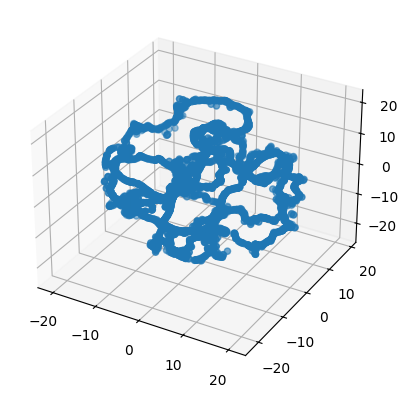

In [188]:
# PLotting in reduced state space

x, y, z = S_tsne.T
print(x)
print(y)
print(z)

fig1 = plt.figure(1)
ax1 = fig1.add_subplot(projection='3d')
ax1.scatter(x, y, z)

In [189]:
# Prediction

from sklearn.cluster import DBSCAN

reduced_model = S_tsne

model = DBSCAN(eps = 4, min_samples = 5)
clusters = model.fit_predict(reduced_model)


<function matplotlib.pyplot.show(close=None, block=None)>

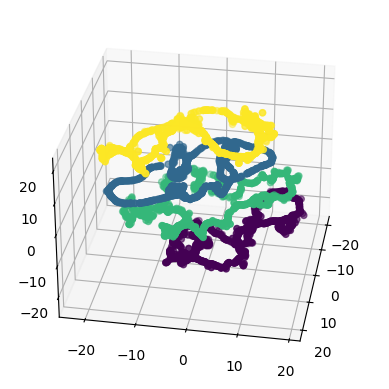

In [190]:
# Plotting with index color

fig2 = plt.figure()
ax2 = fig2.add_subplot(projection='3d')
ax2.view_init(elev = 30, azim = 10)
ax2.scatter(x, y, z, c = clusters)
plt.show

In [191]:
# Loading into sample_submission

sample_submission['cluster'] = clusters
sample_submission.to_csv('sample_submission.csv', index = False)


Discussion Part 1:

a) To do the dimention reduction, I tried 2 different methods. Originally I tried to use PCA, which takes the most important principal components (PCs), and the data is projected on these PCs. The most important PCs are the axis which maximizes the variance. PCA works well when the data set has high linear correlation.

Next, I tried t-SNE, which worked the best of the 2 methods I tried. t-SNE works by converting similarities between the data points to joint probabilities and tries to minimize the Kullback-Leibler divergence between the joint probabilities of the low-dimensional embedding and the high-dimensional data. This method works better than PCA in this case, because it takes no assumptions about linearity. 

UMAP is another dimention reduction method, however I did not implement this in my strategy. UMAP builds a graph of nearby points to capture local relationships, then recreates that graph in lower dimensions while keeping those connections as consistent as possible. UMAP preserves both local and global structure, and like t-SNE, will work for non-linear data. UMAP is also faster and more scalable than t-SNE.

b) The clustering algorithm I used was DBSCAN, with hyperparameters: epsilon = 4 and min_samples = 5. The default values for these parameters were 0.5 and 5, so the only parameter I actually changed in the end was the epsilon. This is the most important hyperparameter for DBSCAN. When it was default (0.5), it could not identify the clusters correctly, but it seemed to work fine when set to 4.

DBSCAN works by finding core samples of high density and expanding clusters from them. This method is good for data which contains clusters of similar density. On the other hand, k-means starts by splitting the dataset into k clusters. Then, each datapoint is placed into a cluster if the center the closest to that datapoint. Unlike DBSCAN, k-means requires you to define how many clusters in advance. 

In [192]:
print(f'The length of a row (datapoint) in the dataset: {len(formatted_data[0])}')

The length of a row (datapoint) in the dataset: 16384


Discussion Part 2:

c) I believe the hidden data are images. Each datapoint has size = 16384, which is the product of 128x128. I think each datapoint is an image, and that each feature is a pixel. Each datapoint is part of 1 of 4 clusters, so there are 4 images. The data has spatial dependencies, meaning neighboring pixels contain related information. Simple methods that treat pixels independently (like PCA) may fail to capture these spatial patterns, because they only consider variance across raw pixel values. It makes sense that t-SNE and UMAP will work well, as they can uncover non-linear connections.

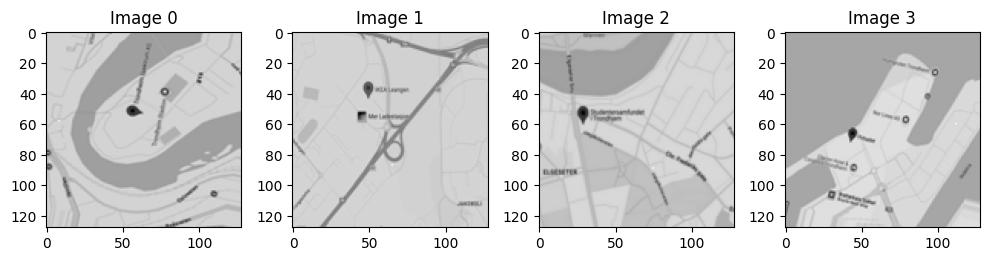

In [ ]:
with open("unsupervised_data.csv") as file:
    header = file.readline().strip().split(',')

column_numbers = np.array([int(col.split('_')[-1]) for col in header if col.startswith("col_")])
order = np.argsort(column_numbers)
pixel_data_sorted = formatted_data[:, order]

image0 = pixel_data_sorted[0]
image1 = pixel_data_sorted[42]
image2 = pixel_data_sorted[24]
image3 = pixel_data_sorted[20]

images = [
    image0.reshape(128, 128),
    image1.reshape(128, 128),
    image2.reshape(128, 128),
    image3.reshape(128, 128)
]

fig, axes = plt.subplots(1, 4, figsize = (10, 3))

for i, ax in enumerate(axes):
    ax.imshow(images[i], cmap = 'gray')
    ax.set_title(f'Image {i}')

plt.tight_layout()
plt.show()

Discussion Part 3:

d) Since each datapoint is one of 4 different images, I started by choosing 4 rows from the dataset that have been identified as the 4 different images in the sample_submission.csv. Then, from the unsupervised_data csv-file, I sorted the columns, extracted 4 rows that matches with the 4 different images, reshaped them into 128x128 structure and plotted the data.

I could immediately see that I was on the right track, but my choosen images were blurry. I found decent quality images through trial and error, until I could identify the four locations based off my general knowledge of Trondheim.

Image0: Trondheim spektrum

Image1: IKEA Leangen

Image2: Studentersamfundet

Image3: Pirbadet